<a href="https://colab.research.google.com/github/ropholuo/ESE546-Intro-to-Deep-learning/blob/main/jinhui_hw1_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn scikit-image

**Download dataset**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

ds = fetch_openml('mnist_784', as_frame = False)
x, y = ds.data, ds.target

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:
np.shape(x)

(70000, 784)

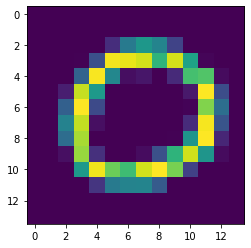

In [ ]:
import matplotlib.pyplot as plt
a = x_train[3].reshape((28,28))
plt.imshow(a)

import cv2
b = cv2.resize(a,(14,14))
plt.imshow(b)

**(c) Construct datasets**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def datasetConstructor(x, y, test_size):
  # find the number of classes and number of samples in each class
  num_class = np.unique(y)
  num_count = {catagory: sum(y==catagory) for catagory in num_class}

  # find the indexes of every samples in each class
  sample_index = {}
  for i, catagory in enumerate(num_class):
    index = [j for j, num in enumerate(y) if num==catagory]
    sample_index[i] = index

  # randomly choose samples in every class
  x_train, x_val, y_train, y_val = [], [], [], []
  train_idx, test_idx = [], []
  for catagory, idx in sample_index.items():
    np.random.shuffle(idx)
    class_trainidx = idx[:int((1-test_size)*len(idx))]
    class_testidx = idx[int((1-test_size)*len(idx)):]
    train_idx += class_trainidx
    test_idx += class_testidx

  x_train = x[train_idx]
  x_val = x[test_idx]
  y_train = y[train_idx]
  y_val = y[test_idx]

  return x_train, x_val, y_train, y_val



In [ ]:
x_train, x_val, y_train, y_val = datasetConstructor(x, y, test_size=0.2)

In [ ]:
np.shape(x_train)

(55996, 784)

The reason is that we still need the validation dataset to further tune the hyperparameters.

**(d) Use SVM Classfier**

Down sample the images to 14*14 in advance

In [ ]:
import cv2

x_train_ds, x_val_ds = np.empty((len(x_train),196)), np.empty((len(x_val),196))
for idx in range(len(x_train)):
  a = x_train[idx].reshape((28,28))
  b = cv2.resize(a, (14,14))
  x_train_ds[idx] = b.reshape(196)

for idx in range(len(x_val)):
  a = x_val[idx].reshape((28,28))
  b = cv2.resize(a, (14,14))
  x_val_ds[idx] = b.reshape(196)

In [ ]:
plt.imshow(x_train_ds[0].reshape(14,14))

apply svm to the dataset

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = svm.SVC(C=1.0, kernel='rbf')

clf = make_pipeline(StandardScaler(), svm.SVC(gamma='scale'))
clf.fit(x_train_ds,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

use the model to predict the validation dataset and calculate the accuracy and confusion matrix

In [ ]:
accute = 0
conf_mat = np.zeros((10,10))

for i in range(len(x_val_ds)):
  pred = clf.predict([x_val_ds[i]])
  if pred == y_val[i]:
    accute += 1
    conf_mat[int(y_val[i]),int(y_val[i])] += 1

  else:
      conf_mat[int(pred),int(y_val[i])] += 1

val_acc = accute/len(x_val)
print(val_acc)
print(conf_mat)

0.9690088546129677
[[1.356e+03 0.000e+00 4.000e+00 3.000e+00 2.000e+00 2.000e+00 4.000e+00
  1.000e+00 3.000e+00 2.000e+00]
 [2.000e+00 1.554e+03 1.000e+00 0.000e+00 3.000e+00 1.000e+00 5.000e+00
  5.000e+00 1.100e+01 4.000e+00]
 [5.000e+00 9.000e+00 1.358e+03 2.000e+01 6.000e+00 5.000e+00 1.800e+01
  1.500e+01 5.000e+00 6.000e+00]
 [1.000e+00 2.000e+00 9.000e+00 1.365e+03 0.000e+00 1.100e+01 0.000e+00
  5.000e+00 1.300e+01 6.000e+00]
 [1.000e+00 3.000e+00 6.000e+00 0.000e+00 1.324e+03 2.000e+00 2.000e+00
  7.000e+00 9.000e+00 1.400e+01]
 [5.000e+00 0.000e+00 2.000e+00 1.700e+01 0.000e+00 1.225e+03 6.000e+00
  0.000e+00 9.000e+00 4.000e+00]
 [5.000e+00 1.000e+00 2.000e+00 0.000e+00 8.000e+00 7.000e+00 1.340e+03
  0.000e+00 2.000e+00 0.000e+00]
 [3.000e+00 2.000e+00 4.000e+00 5.000e+00 1.000e+00 0.000e+00 0.000e+00
  1.410e+03 6.000e+00 1.600e+01]
 [3.000e+00 2.000e+00 1.200e+01 1.700e+01 3.000e+00 5.000e+00 1.000e+00
  1.000e+00 1.301e+03 3.000e+00]
 [0.000e+00 3.000e+00 0.000e+00 2.00

**(g) Use GridSearch function to find better C value**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale

parameters = {'C':[1,3,5,7,9]}
x_train_pre = scale(x_train_ds)
clf = GridSearchCV(
    svm.SVC(kernel='rbf', gamma='scale',probability=False), 
    parameters,
    n_jobs=-1,
    cv=2)
clf.fit(x_train_pre,y_train)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
n 

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([49.98128033, 45.12441969, 44.33623028, 44.63502479, 43.84102571]), 'std_fit_time': array([0.18506122, 0.13853478, 0.24146295, 0.06136441, 0.00189197]), 'mean_score_time': array([85.86342502, 76.19795549, 75.37422454, 79.6425097 , 73.8806237 ]), 'std_score_time': array([0.20323324, 0.42508876, 1.0016526 , 0.6455307 , 0.53603208]), 'param_C': masked_array(data=[1, 3, 5, 7, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1}, {'C': 3}, {'C': 5}, {'C': 7}, {'C': 9}], 'split0_test_score': array([0.96103293, 0.96653332, 0.96724766, 0.96767626, 0.967962  ]), 'split1_test_score': array([0.95985428, 0.96639046, 0.96778341, 0.96799771, 0.96799771]), 'mean_test_score': array([0.9604436 , 0.96646189, 0.96751554, 0.96783699, 0.96797986]), 'std_test_score': array([5.89327809e-04, 7.14336738e-05, 2.67876277e-04, 1.60725766e-04,
       1.78584185e-05]), 'rank_test_score': array([5, 4, 3, 2, 1], dtype=

**(h) Modeled with Gabor functions**

Create dataset with 500 samples and downsample it

In [ ]:
import cv2
import numpy as np

def fiveHundredImages(x, y):
  # find the number of classes and number of samples in each class
  num_class = np.unique(y)
  num_count = {catagory: sum(y==catagory) for catagory in num_class}

  # find the indexes of every samples in each class
  sample_index = {}
  for i, catagory in enumerate(num_class):
    index = [j for j, num in enumerate(y) if num==catagory]
    sample_index[i] = index

  # randomly choose samples in every class
  x_train, x_val, y_train, y_val = [], [], [], []
  train_idx, test_idx = [], []
  for catagory, idx in sample_index.items():
    np.random.shuffle(idx)
    class_trainidx = idx[:50]
    class_testidx = idx[50:100]
    train_idx += class_trainidx
    test_idx += class_testidx

  x_train = x[train_idx]
  x_val = x[test_idx]
  y_train = y[train_idx]
  y_val = y[test_idx]

  return x_train, x_val, y_train, y_val

aa, bb, y_train_few, y_val_few = fiveHundredImages(x,y)

x_train_few, x_val_few = np.empty((500,196)), np.empty((500,196))
for idx in range(500):
  a = aa[idx].reshape((28,28))
  b = cv2.resize(a, (14,14))
  x_train_few[idx] = b.reshape(196)

for idx in range(500):
  a = bb[idx].reshape((28,28))
  b = cv2.resize(a, (14,14))
  x_val_few[idx] = b.reshape(196)

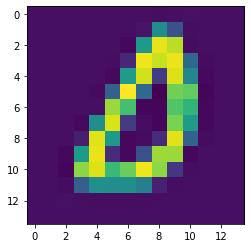

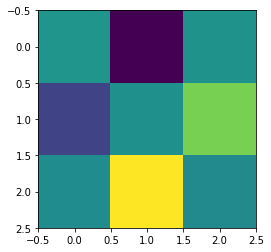

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np
import matplotlib.pyplot as plt

freq, theta, bandwidth = 0.5, np.pi/5, 5
gk = gabor_kernel(frequency=freq, theta=theta, bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(gk.real)
plt.figure(2); plt.clf(); plt.imshow(gk.imag)

image = x_train_few[0].reshape((14,14))
coeff_real, _ = gabor(image, frequency=freq, theta=theta, 
                      bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(coeff_real)

**(j) Use filter bank to train SVM**

generate the filter bank and check the plots

In [ ]:
from skimage.filters import gabor_kernel, gabor

theta = np.arange(0, np.pi, np.pi/4)
frequency = np.arange(0.05, 0.5, 0.15)
bandwidth = np.arange(0.3, 1, 0.3)

# for i in theta:
#   for j in frequency:
#     for k in bandwidth:
#       gk = gabor_kernel(frequency=j, theta=i, bandwidth=k)
#       plt.figure(); plt.clf(); plt.imshow(gk.real)
#       plt.figure(); plt.clf(); plt.imshow(gk.imag)

Apply the filter bank to training and validation dataset

In [ ]:
import pdb

x_train_conv = np.zeros((500,7056))

for idx in range(500):
  coeff = []
  for i in theta:
    for j in frequency:
      for k in bandwidth:
        image = x_train_few[idx].reshape((14,14))
        coeff_real, _ = gabor(
            image, frequency=j, theta=i, bandwidth=k)
        # pdb.set_trace()
        coeff.append(coeff_real.reshape(-1))
  x_train_conv[idx] = np.array(coeff).reshape(-1)

In [ ]:
np.shape(y_val_few)

In [ ]:
x_val_conv = np.zeros((500,7056))

for idx in range(500):
  coeff = []
  for i in theta:
    for j in frequency:
      for k in bandwidth:
        image = x_val_few[idx].reshape((14,14))
        coeff_real, _ = gabor(
            image, frequency=j, theta=i, bandwidth=k)
        # pdb.set_trace()
        coeff.append(coeff_real.reshape(-1))
  x_val_conv[idx] = np.array(coeff).reshape(-1)

Train the model with filtered dataset

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

classifier = svm.SVC(C=1.0, kernel='rbf')

clf = make_pipeline(StandardScaler(), svm.SVC(gamma='scale'))
clf.fit(x_train_conv,y_train_few)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Test the accuracy of new model

In [ ]:
accute = 0

for i in range(len(x_val_conv)):
  pred = clf.predict([x_val_conv[i]])
  if pred == y_val_few[i]:
    accute += 1

val_acc = accute/len(x_val_conv)
print(val_acc)

0.862
